In [ ]:
pip install pandas==1.1.0

     |████████████████████████████████| 10.5MB 13.5MB/s 
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
import numpy  as np
import pandas as pd

#Preprocessing
from sklearn import preprocessing
import nltk
import pandas as pd
import re
from nltk.stem import PorterStemmer

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud


In [ ]:
df = pd.read_csv('records.csv', encoding='utf-8')
df.head()

,S. No.,Name of Faculty/Staff,Department,FDP/Conferences Details,Dates,No. of Days,Organised by University/Institution/Organisation,Recommended by (HOD) (YES/NO),Approved by (Director Sir) (YES/NO)
0,1.0,Mrs. Vaishnavi Dabir,Civil,Stress: Deep Roots & Delightful Remedies,24.03.2015,1,"Conference Room, ELTIS, Model Colony, Pune",Yes,Yes
1,2.0,Shilpa Gite,CS&IT,Stress: Deep Roots & Delightful Remedies,24.03.2015,1,"Conference Room, ELTIS, Model Colony, Pune",yes,YES
2,3.0,Shilpa Gite,CS&IT,Qualitative Research Methods,10/2015,1,STLTC,YES,YES
3,4.0,Shilpa Gite,CS&IT,Internet of Things and Smart City,10/2015,1,"TLRC ,",YES,YES
4,5.0,Shilpa Gite,CS&IT,Research Publication with High Impact factor,10/2015,1,"TLRC ,",YES,YES


In [ ]:
df.count()

S. No.                                              548
Name of Faculty/Staff                               544
Department                                          543
FDP/Conferences Details                             544
Dates                                               544
No. of Days                                         540
Organised by University/Institution/Organisation    526
Recommended by (HOD) (YES/NO)                       460
Approved by (Director Sir) (YES/NO)                 359
dtype: int64

In [ ]:
df.drop('S. No.',axis='columns', inplace=True)

In [ ]:
df.drop('Recommended by (HOD) (YES/NO)',axis='columns', inplace=True)
df.drop('Approved by (Director Sir) (YES/NO)',axis='columns', inplace=True)
df.drop('Dates',axis='columns', inplace=True)
df.drop('No. of Days',axis='columns', inplace=True)

In [ ]:
df.count()

Name of Faculty/Staff                               544
Department                                          543
FDP/Conferences Details                             544
Organised by University/Institution/Organisation    526
dtype: int64

Handle Missing Values

In [ ]:
#fill missing cells with NA
df.replace('', np.nan)
df.head(8)

,Name of Faculty/Staff,Department,FDP/Conferences Details,Organised by University/Institution/Organisation
0,Mrs. Vaishnavi Dabir,Civil,Stress: Deep Roots & Delightful Remedies,"Conference Room, ELTIS, Model Colony, Pune"
1,Shilpa Gite,CS&IT,Stress: Deep Roots & Delightful Remedies,"Conference Room, ELTIS, Model Colony, Pune"
2,Shilpa Gite,CS&IT,Qualitative Research Methods,STLTC
3,Shilpa Gite,CS&IT,Internet of Things and Smart City,"TLRC ,"
4,Shilpa Gite,CS&IT,Research Publication with High Impact factor,"TLRC ,"
5,Shilpa Gite,CS&IT,Gender sensitization,STLTC
6,Shilpa Gite,CS&IT,Big Data and Hadoop Developer Certification,NaN
7,Arpita Deodikar,Applied Science,Stress: Deep Roots & Delightful Remedies,"Conference Room, ELTIS, Model Colony, Pune"


In [ ]:
##  How many NA in my data 
df.isna().sum()

Name of Faculty/Staff                                5
Department                                           6
FDP/Conferences Details                              5
Organised by University/Institution/Organisation    23
dtype: int64

In [ ]:
#fillna values with mode
l=df.filter(["Name of Faculty/Staff", "Department","Organised by University/Institution/Organisation"]).mode()
df[["Name of Faculty/Staff", "Department","Organised by University/Institution/Organisation"]]=df[["Name of Faculty/Staff", "Department","Organised by University/Institution/Organisation"]].fillna(value=l.iloc[0])

In [ ]:
#Replace NaN with mode
df["FDP/Conferences Details"].fillna( df["FDP/Conferences Details"].mode()[0] , inplace=True )

In [ ]:
df.rename(columns = {'Organised by University/Institution/Organisation': 'University', 'Name of Faculty/Staff': 'Faculty', 'FDP/Conferences Details': 'Conference_Details'}, inplace = True)


In [ ]:
df.isna().sum()

Faculty               0
Department            0
Conference_Details    0
University            0
dtype: int64

Data Cleaning

In [ ]:
df.Department.unique()

array(['Civil', 'CS&IT', 'Applied Science', 'Appled Science', 'CS and IT',
       'E&TC', 'Mechanical', 'CS/IT', 'Applied Sc', 'Applied Sc.',
       'CS & IT', 'Mechanical ', 'App Science', 'IT', 'Mechanical Eng',
       'Applied Sciences', 'ENTC', 'Applied. Science', 'E & TC', 'CS-IT',
       'E &TC', 'CS &IT', 'CS', 'Mech', 'Mech Engg', 'Civil ', 'Computer',
       'Mechnical'], dtype=object)

In [ ]:
import time

# starting time
start = time.time()
df.Department.replace(['CS&IT','CS/IT','CS and IT','CS & IT','IT','CS-IT','CS &IT','CS','Computer'],'CS and IT' , inplace=True)
df.Department.replace(['Civil','Civil '],'Civil' , inplace=True)
df.Department.replace(['Applied Science','Appled Science','Applied Sc','Applied Sc.','Applied Sciences','Applied. Science','App Science'],'Applied Science' , inplace=True)
df.Department.replace(['E&TC','ENTC','E & TC','E &TC'],'ENTC' , inplace=True)
df.Department.replace(['Mechanical','Mech Engg','Mechnical','Mechanical Eng','Mechanical ','Mech'],'Mechanical' , inplace=True)
df.University.replace(["Conference Room, ELTIS, Model Colony, Pune",'Conference room','ELTIS Model Colony','ELTIS, Model Colony, Pune','ELTIS,Model colony','ELTIS'],'ELTIS Model Colony' , inplace=True)
df.University.replace(['STLTC','STLRC','TLRC','STLRC SIU',
                       'STLRC, SIU at SIT',
                       'STLRC, SIU ( Venue : SIT )',
                       'TLRC, SIU','STLRC, SIU','TLRC'
                       'TLRC,SIU (Venue:Conference Room, ELTIS, Model',
                       'STLRC at conference hall SIU','STLRC at SID viman nagar', 
                       'STLRC at Convention Hall SIU',
                       'STLRC at conference hall SIU and SIMS Kharki',
                       'STLRC at conventional hall SIU ', 'STLRC at CAD CAM LAB SIT',
                       'STLRC,SIU,Pune','STLRC, SIU, Pune','TLRC ,','TLRC , SIU','yes'],'STLRC, SIU' , inplace=True)
df.University.replace(['SIT and STLRC ( Venue : SIT )','SIT & STLRC, SIU',
                       'SIT, STLRC','STLRC at SIT','STLRC, at SIT','SIT & STLRC'
                       'SIT &STLRC','SIT Civil, STLRC','SIT in collaboration with STLRC',
                       'SIT & STLRC','SIT &STLRC','SIT\xa0&STLRC '],'STLRC and SIT' , inplace=True)
df.University.replace(['SIMS and STLRC, Pune','SIMS and STLRC, SIU','SIMS (Khirkee), STLRC',
                        'STLRC, Computer Lab, SIMS Kirkee','STLRC at SIMS Kirkee'],'SIMS and STLRC' , inplace=True)
df.University.replace(['SIBM and STLRC, SIU','SIBM, Lavale and STLRC','STLRC, SIBM, SIU','SIBM in Collaboration with STLRC',
                       'STLRC SIBM SIU'],'SIBM and STLRC' , inplace=True)
df.University.replace(['SIIB, Hinjewadi','SIIB, SIU, Pune',],'SIIB Hinjewadi' , inplace=True)
df.University.replace(['TLRC, SIU ( Venue : SCMHRD, Hinjewadi )','TLRC,SCMHRD Pune','TLRC, SCMHRD','SCMHRD, Hinjewadi Pune'],'STLRC at SCMHRD Hinjewadi' , inplace=True)
df.University.replace(['SCMS and STLRC, SIU','SCMS, Viman Nagar Pune'],'SCMC Viman Nagar' , inplace=True)
df.University.replace(['Dept. of Civil Engineering, NITTTR Chennai and STLRC','SIT, STLRC and NITTTR, Chennai','STLRC & SIT, Pune,NITTTR Chennai','SIT in Collaboration with STLRC and National Institute of Technical Teachers Training Institute, HRD Ministry, Govt. of India.','SIT, STLRC and NIITR Chennai','SIT, STLRC,NITTTR','STLRC + NITTTIR + SIT civil Dept, Pune'],'SIT, STLRC and NIITR Chennai' , inplace=True)
df.University.replace(['SIU', 'SIU, Lavale Campus','SIU, Pune','SIU,Pune', 'SIU, at SLS Viman nagar', 'SIU,Pune\n', 'Convention Hall, SIU, Pune','Convention Hall, SIU, Lavale\n', 'MDP Hall SIBM, SIU Lavale','siu','Faculty of Humanities & Social Science,SIU' ],'SIU Lavale Campus' , inplace=True)
df.University.replace(['SIT','SIT, Pune','SIT,Pune','sit','SIT,Lavale','SIT, SIU', 'SIT civil dept.'],'Symbiosis Institute of Technology' , inplace=True)
df.University.replace(['IIT, Mumbai','IIT Delhi, New Delhi','IIT, Roorkee','IIT Roorkee, Uttarakhand','IIT Gandhinagar','IIT Bombay','IIT Roorkee', 'IIT Indore'],'Indian Institute of Technology' , inplace=True)
df.University.replace(['SIBM','SIBM, SIU'],'Symbiosis Institute of Buisness Management' , inplace=True)
df.University.replace(['Department of Computer Engineering & Information TechnologyCollege of Engineering, Pune','COEP, Pune','Department of I & C, COEP,Pune','COEP and AICTE','COEP'],'College of Engineering Pune' , inplace=True)

# First we will keep a copy of data
df_copy = df.copy()
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)

# program body ends

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")
#Replace Noisy Departments


Runtime of the program is 1.0264561176300049


In [ ]:
#Replace Noisy Universities

df.University.unique()

array([ 25, 100, 110,  96,  81,  83,  98,  76,  85,  80,  44,  89,  49,
        14,  90,  39,  40, 121,  92,  86,  46,  13,  79,  94,  84,  62,
        57,  15,  29,  82, 112,  18, 111,  77,  95,  17,  27,  53,   7,
        11,   4,  48,  69,  22, 109, 103,  33, 105,  88, 123,  55,  51,
         6,  47,  91,  99,  26,   8, 107,  10,  56, 104,  12, 128, 120,
       106,  93,  50,  58, 101,   0, 108, 113,  67, 125,  19,   3,  37,
       115,  64,  63,  73,  74,  28,   9,  54,  42, 127,   5, 130,  32,
       124,  45,  71,  34,  35,  36, 116, 117,  59,  20,  16,  78, 118,
        87, 129, 122,  68,  31, 119,  66,   1, 102,  65,  30, 126,  43,
        21,  24,  23,  97,  38,  52,  70,   2,  72, 114,  75,  60,  41,
        61])

CALCULATING PROBABILITY ERROR AND WEIGHT

In [ ]:
row_total = np.sum(df,axis=1) #Row Addition
column_total= np.sum(df,axis=0) #Column Addition

In [ ]:
total_number_row= np.sum(row_total)

print(row_total)
print(column_total)
print('Total No. of Row = ',row_total.size)

df.head()

0      348
1      392
2      434
3      390
4      441
      ... 
544    300
545    217
546    121
547    312
548    355
Length: 549, dtype: int64
Faculty               29428
Department              999
Conference_Details    83146
University            47360
dtype: int64
Total No. of Row =  549


,Faculty,Department,Conference_Details,University
0,58,2,263,25
1,103,1,263,25
2,103,1,230,100
3,103,1,186,100
4,103,1,237,100


In [ ]:
sum = 0
for x in range(row_total.size):
    sum = sum + row_total[x]
print(sum)
#Declaring Empty array
probability = []
error = []
index = []

160933


In [ ]:
#Finding Propability
for i in range(row_total.size-1):
    probability.append (( row_total[i] ) / ( row_total[i] + row_total[i+1] ))
   
print(row_total[i+1])
print(row_total[0])

probability.append( row_total[i+1] / ( row_total[i+1] + row_total[0] ))
print(probability)

355
348
[0.4702702702702703, 0.4745762711864407, 0.5266990291262136, 0.4693140794223827, 0.5653846153846154, 0.5824742268041238, 0.4576271186440678, 0.5975103734439834, 0.5187165775401069, 0.4699738903394256, 0.656957928802589, 0.3940520446096654, 0.49244712990936557, 0.4375, 0.5046728971962616, 0.5158150851581509, 0.4682352941176471, 0.5330188679245284, 0.518324607329843, 0.46115288220551376, 0.4919908466819222, 0.5080091533180778, 0.49539170506912444, 0.5239234449760766, 0.4682352941176471, 0.5330188679245284, 0.49748743718592964, 0.4819277108433735, 0.489749430523918, 0.5209302325581395, 0.49047619047619045, 0.4942263279445728, 0.5116822429906542, 0.529113924050633, 0.5081967213114754, 0.45685279187817257, 0.5047169811320755, 0.5035971223021583, 0.5830985915492958, 0.42406876790830944, 0.5101522842639594, 0.4562647754137116, 0.6036745406824147, 0.578544061302682, 0.6010928961748634, 0.3004115226337449, 0.5345911949685535, 0.2965931863727455, 0.5, 0.45348837209302323, 0.5280898876404

In [ ]:
#Finding Error
for j in range(row_total.size):
    error.append(( probability[j] *  sum ) / ( np.sqrt( sum * probability[j]  * ( 1 - probability[j] ) )))

print(error)

[377.9802796929156, 381.2595424506479, 423.1897252884852, 377.25548462583305, 457.5536237252097, 473.82641245059614, 368.4931732746212, 488.7850707221168, 416.47330179870005, 377.75549211448947, 555.1593261024177, 323.50551146915603, 395.14975310754323, 353.79388224093293, 404.9314407379515, 414.0606369304819, 376.4392263705291, 428.59211614331184, 416.14649124306345, 371.1181846484273, 394.78922988860285, 407.64283272218523, 397.48406820259584, 420.841028007336, 376.4392263705291, 428.59211614331184, 399.1536922038928, 386.9174540894605, 393.02282626367355, 418.3241647288816, 393.5947320329785, 396.5586092793943, 410.64966034403324, 425.2450084413703, 407.7958230945154, 367.9187486490416, 404.9671474035771, 404.06108736036504, 474.4351620326775, 344.23528341565844, 409.3944283053461, 367.48303125568884, 495.1057817268323, 470.0182104789326, 492.44469823719066, 262.88119660677853, 429.9482212696931, 260.4952766823022, 401.16455476524845, 365.43145586576173, 424.37211321691535, 390.9551

In [ ]:
#Finding Weight
weight = np.sqrt(row_total)

In [ ]:
data = { 'Probability': probability, 'Error': error, 'Weight': weight}
df1 = pd.DataFrame(data)
combinedDf = pd.concat([df_copy, df1], axis = 1)

In [ ]:
combinedDf.head()
combinedDf.to_excel("Cleaned_FDP_Records.xlsx")  

CFBA IMPLEMETATION

In [ ]:
#importing libraries
import pandas as pd
import math as mp
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score

In [ ]:
#visualization
def visualize(df_basic,df_incremental,df_merge):
  df_basic.to_excel("Basic_FDP_Records.xlsx") 
  df_incremental.to_excel("Incremental_FDP_Records.xlsx")  
  df_merge.to_excel("Merge_FDP_Records.xlsx")  

  
  ax = df_basic.groupby(['CNumber'])['CNumber'].count().plot.bar(title = "Basic...")
  ax.set_xlabel('Clusters')
  ax.set_ylabel('Frequency')
  plt.show()

  ax = df_incremental.groupby(['CNumber'])['CNumber'].count().plot.bar(title = "Incremental")
  ax.set_xlabel('Clusters')
  ax.set_ylabel('Frequency')
  plt.show()

  ax = df_merge.groupby(['CNumber','Cluster_Type'])['Cluster_Type'].count().unstack(0).plot.bar(stacked=True, figsize=(8, 6))
  ax.legend(loc = 'center right',bbox_to_anchor = (1.4,0.5),ncol = 1)
  plt.title('iteration 1')
  plt.xlabel('clusters')
  plt.ylabel('No of Records')
  plt.show()

In [ ]:
# merging basic and incremental dataset
def mergefile_graph(df_basic,df_incremental):
  df_basic['Cluster_Type'] = 'Basic_cluster'
  df_incremental['Cluster_Type'] = 'Incremental_1'
  df_basic = df_basic.append(df_incremental)
  df_basic=df_basic.sort_values(by = ['CNumber'])
  df_basic.to_csv('records.csv',index = False)
  return df_basic
  

In [ ]:
#merging training and test dataset
def mergefile_representative(dftrain,dftest):
  dftrain = dftrain.append(dftest)
  dftrain = dftrain.sort_values(by = ['CNumber'])
  dftrain.to_csv('records.csv',index = False)
  (dftrain.groupby(['CNumber'],as_index = False).mean()).to_csv('records.csv')

In [ ]:
#basic clustering code using cfba
def basic_cluster_lone(df,df1):
  df['row_total'] = df.sum(axis = 1)
  print("after row total",df.head())
  count = 1
  for i in range(len(df)):
    df.loc[i,'Flag']=False
  c1 = []

  for i in range(len(df)):
    if(df.Flag[i]==False):
      countercheck = []
      df1.loc[i,'CNumber'] = count
      df1.loc[i,'Closeness_Value'] = 0
      df.loc[i,'Flag']=True
      df.loc[i,'CNumber'] = count
      for j in range(i+1,len(df)):
        if(df.Flag[j]==False):
          
          c1 = df.row_total[i]/(df.row_total[i]+df.row_total[j])
          
          d1 = df.Faculty[i]+df.Faculty[j]
          d2=c1*d1-df.Faculty[i]
          d3 = mp.sqrt(d1*c1*(1-c1))
          prob1 = d2/d3
          c_square = mp.pow(prob1,2)
          weight = mp.sqrt(d1)
          c = c_square * weight
          
          #second feature
          col2 = df.Department[i]+df.Department[j]
          col21 = (c1*col2-df.Department[i])/mp.sqrt(col2*c1*(1-c1))
          e2 = mp.pow(col21,2)
          wei2 = mp.sqrt(col2)
          c2 = e2 * wei2

          
          #third feature
          col3 = df.Conference_Details[i]+df.Conference_Details[j]
          col31 = (c1*col3-df.Conference_Details[i])/mp.sqrt(col3*c1*(1-c1))
          e3 = mp.pow(col31,2)
          wei3 = mp.sqrt(col3)
          c3 = e3 * wei3
          

          #fourth feature
          col4 = df.University[i]+df.University[j]
          col41 = (c1*col4-df.University[i])/mp.sqrt(col4*c1*(1-c1))
          e4 = mp.pow(col41,2)
          wei4 = mp.sqrt(col4)
          c4 = e4 * wei4

          close1 = c+c2+c3+c4
          close2 = weight+wei2+wei3+wei4
          close = close1/close2

          print("closeness:",i+1,j+1,close)
          if close<=1:
            df1.loc[j,'CNumber'] = count
            df1.loc[j,'Closeness Value']=close
            df.loc[j,'Flag']=True
            df.loc[j,'CNumber']=count
            countercheck.append(j)
            #add name of csv of incremental
            df1.to_csv('records.csv')
        if len(countercheck) >= 2:
          count = count+1
          
  df1['CNumber'] = df1['CNumber'].astype(int)
  df1 = df1.sort_index()
  df1 = df1.sort_values(by = 'CNumber')
  #add name of csv
  df1.to_csv('records.csv')
  df =df.drop(['Flag','row_total'],axis=1)
  df['CNumber'] = df['CNumber'].astype(int)
  #add name of csv
  (df.groupby(['CNumber'],as_index = False).mean()).to_csv('records.csv')
  return df1,df


In [ ]:
# incremental clustering code using cfba
def incremental_cluster(dftest,df2):
  df = pd.read_csv('records.csv')
  print("test data",df.head())
  df_rep = df.iloc[:,1:]
  df_rep['row_total'] = df_rep.sum(axis =1)
  print(df_rep.head())
  whole = []
  outlier = []
  fclose=[]
  outlierclose=[]
  dftest['row_total'] = dftest.sum(axis =1)
  for i in range(len(dftest)):
    dftest.loc[i,'Flag']=False
  c1 = []
  for i in range(len(df_rep)):
    whole.append(i)
    for j in range(len(dftest)):
      if(dftest.Flag[j]==False):
        c1 = df_rep.row_total[i]/(df_rep.row_total[i]+dftest.row_total[j])
        
        d1 = df_rep.Faculty[i]+dftest.Faculty[j]
        d2=c1*d1-df_rep.Faculty[i]
        d3 = mp.sqrt(d1*c1*(1-c1))
        prob1 = d2/d3
        c_square = mp.pow(prob1,2)
        weight = mp.sqrt(d1)
        c = c_square * weight
       
        #second feature - Department
        col2 = df_rep.Department[i]+dftest.Department[j]
        col21 = (c1*col2-df_rep.Department[i])/mp.sqrt(col2*c1*(1-c1))
        e2 = mp.pow(col21,2)
        wei2 = mp.sqrt(col2)
        c2 = e2 * wei2

        #third feature
        
        col3 = df.Conference_Details[i]+df.Conference_Details[j]
        col31 = (c1*col3-df.Conference_Details[i])/mp.sqrt(col3*c1*(1-c1))
        e3 = mp.pow(col31,2)
        wei3 = mp.sqrt(col3)
        c3 = e3 * wei3
        

        #fourth feature
        col4 = df_rep.University[i]+dftest.University[j]
        col41 = (c1*col4-df_rep.University[i])/mp.sqrt(col4*c1*(1-c1))
        e4 = mp.pow(col41,2)
        wei4 = mp.sqrt(col4)
        c4 = e4 * wei4


        close1 = c+c2+c3+c4
        close2 = weight+wei2+wei3+wei4
        close = close1/close2

        print("closeness:",i+1,j+1,close)
        if close<=1:
          whole.append(j)
          df2.loc[j,'CNumber'] = df.CNumber[i]
          df2.loc[j,'Closeness Value']=close
          dftest.loc[j,'Flag']=True
          dftest.loc[j,'CNumber']=df.CNumber[i]
          #add name of csv of incremental
          df2.to_csv('records.csv')
        else:
          outlier.append(j)
          outlierclose.append(close)
    fclose.append(0)

  resultant_list = list(set(outlier)-set(whole))
  print('Difference is :',resultant_list)
  if(len(resultant_list)!=None):
    dftest.loc[resultant_list,'CNumber']=i+2
    dftest.loc[resultant_list,'Flag']=True
    df2.loc[resultant_list,'CNumber']=i+2
  df2 = df2.fillna(-1)
  df2['CNumber'] = df2['CNumber'].astype(int)
  df2 = df2.sort_index()
  df2 = df2.sort_values(by = 'CNumber')
  #add name of csv
  df2.to_csv('records.csv')
  dftest =dftest.drop(['Flag','row_total'],axis=1)
  return df2,dftest

In [ ]:
#scaling the dataset function

def scale(pandas_df):
  features = ['Faculty','Department','Conference_Details','University']
  features_v = pandas_df[features]
  scaler = MinMaxScaler(feature_range = (0,10))
  scaler_features = scaler.fit_transform(features_v)
  print("normalised dataset with MinMaxScaler",scaler_features)
  features_train, features_test = train_test_split(scaler_features, test_size =0.2)
  train1 = pd.DataFrame(features_train,columns = ['Faculty','Department','Conference_Details','University'])
  test1 = pd.DataFrame(features_test,columns = ['Faculty','Department','Conference_Details','University'])
  print("length of training and testing data",len(train1),len(test1))
  df_inverse = scaler.inverse_transform(features_train)
  df1 = pd.DataFrame(df_inverse,columns = ['Faculty','Department','Conference_Details','University'])
  df2 = scaler.inverse_transform(features_test)
  df2 = pd.DataFrame(df2,columns = ['Faculty','Department','Conference_Details','University'])
  print("length of Inversed data",len(df1),len(df2))
  return train1,test1,df1,df2


normalised dataset with MinMaxScaler [[ 4.71544715  5.          8.29652997  1.92307692]
 [ 8.37398374  2.5         8.29652997  1.92307692]
 [ 8.37398374  2.5         7.2555205   7.69230769]
 ...
 [ 1.95121951 10.          1.04100946  4.61538462]
 [10.         10.          4.54258675  3.15384615]
 [ 2.84552846 10.          8.04416404  4.69230769]]
length of training and testing data 439 110
length of Inversed data 439 110
after row total     Faculty  Department  Conference_Details  University  row_total
0  0.975610         0.0            2.996845    7.692308  11.664763
1  1.382114         2.5            0.914826    7.692308  12.489248
2  0.650407         7.5            8.801262    6.615385  23.567053
3  8.536585         0.0            2.681388    6.384615  17.602589
4  9.024390         2.5            2.523659    8.461538  22.509588
closeness: 1 2 0.700514177606711
closeness: 1 3 1.9904980642718932
closeness: 1 4 nan
closeness: 1 5 1.620016614295594
closeness: 1 6 1.385084154182669
close

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


closeness: 1 125 2.7640781055086445
closeness: 1 126 nan
closeness: 1 127 0.9829387303878547
closeness: 1 128 nan
closeness: 1 129 0.9128371516750261
closeness: 1 130 2.3788907535144124
closeness: 1 131 nan
closeness: 1 132 nan
closeness: 1 133 1.4948100196142007
closeness: 1 134 2.4393458450594454
closeness: 1 135 2.1491655217196604
closeness: 1 136 2.0512340908836113
closeness: 1 137 nan
closeness: 1 138 nan
closeness: 1 139 1.8524179274206063
closeness: 1 140 2.3536909546901086
closeness: 1 141 1.58467181632581
closeness: 1 142 1.31950366645417
closeness: 1 143 nan
closeness: 1 144 0.8585060517280498
closeness: 1 145 nan
closeness: 1 146 0.5330459471108698
closeness: 1 147 2.1727087842147585
closeness: 1 148 1.9883373827297806
closeness: 1 149 2.1548839968781115
closeness: 1 150 1.583621977246141
closeness: 1 151 nan
closeness: 1 152 nan
closeness: 1 153 0.6299304498858799
closeness: 1 154 nan
closeness: 1 155 0.8589146962780613
closeness: 1 156 2.4016490525524037
closeness: 1 157 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


Streaming output truncated to the last 5000 lines.
closeness: 113 223 nan
closeness: 113 237 nan
closeness: 113 241 nan
closeness: 113 246 nan
closeness: 113 248 nan
closeness: 113 252 nan
closeness: 113 254 nan
closeness: 113 270 nan
closeness: 113 273 nan
closeness: 113 275 nan
closeness: 113 277 nan
closeness: 113 281 nan
closeness: 113 282 nan
closeness: 113 283 nan
closeness: 113 295 nan
closeness: 113 306 nan
closeness: 113 308 nan
closeness: 113 309 nan
closeness: 113 311 nan
closeness: 113 314 nan
closeness: 113 330 nan
closeness: 113 332 nan
closeness: 113 333 nan
closeness: 113 334 nan
closeness: 113 335 nan
closeness: 113 336 nan
closeness: 113 337 nan
closeness: 113 338 nan
closeness: 113 342 nan
closeness: 113 344 nan
closeness: 113 345 nan
closeness: 113 349 nan
closeness: 113 351 nan
closeness: 113 363 nan
closeness: 113 364 nan
closeness: 113 372 nan
closeness: 113 373 nan
closeness: 113 374 nan
closeness: 113 375 nan
closeness: 113 376 nan
closeness: 113 378 nan
closen

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


 31 59.09567582760832
closeness: 39 32 64.56877970847987
closeness: 39 33 85.97296635877515
closeness: 39 34 63.567502744280056
closeness: 39 35 58.524950477558534
closeness: 39 36 59.249696442000094
closeness: 39 37 68.24321597909426
closeness: 39 38 60.15714018756922
closeness: 39 41 74.70310952406433
closeness: 39 42 61.716907782398486
closeness: 39 43 70.83854852625802
closeness: 39 44 113.66401317208204
closeness: 39 46 51.06100676341255
closeness: 39 47 258.78710119835836
closeness: 39 48 86.00276071585442
closeness: 39 49 90.776479573546
closeness: 39 50 106.28551101996217
closeness: 39 56 91.02988083747638
closeness: 39 58 65.74106104956847
closeness: 39 62 66.25732316859443
closeness: 39 64 65.23581512583452
closeness: 39 66 77.84949531801549
closeness: 39 68 65.22279413287166
closeness: 39 70 81.72042905421226
closeness: 39 71 30.031150311335857
closeness: 39 72 91.53887349224259
closeness: 39 75 88.55449974342665
closeness: 39 77 64.37256091036993
closeness: 39 78 67.5885390

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


Streaming output truncated to the last 5000 lines.
closeness: 232 17 180.563434528526
closeness: 232 18 120.67940364860799
closeness: 232 19 158.62222849591328
closeness: 232 25 149.20058438270203
closeness: 232 26 150.25214447997305
closeness: 232 30 119.00293419057432
closeness: 232 31 157.9459187004128
closeness: 232 32 201.32597179807883
closeness: 232 33 253.6290195256528
closeness: 232 34 176.65870084364087
closeness: 232 35 177.91370536961682
closeness: 232 36 171.35128885805258
closeness: 232 37 206.36237120944767
closeness: 232 38 179.7513517679361
closeness: 232 41 225.96527909355214
closeness: 232 42 186.94379030854552
closeness: 232 43 211.944883181889
closeness: 232 44 325.1531763571919
closeness: 232 46 136.3222721592209
closeness: 232 47 651.6395404411443
closeness: 232 48 240.01482679415568
closeness: 232 49 257.84087509029297
closeness: 232 50 304.8039650553355
closeness: 232 56 274.30341106905416
closeness: 232 58 191.1924689778266
closeness: 232 62 202.11411470718585

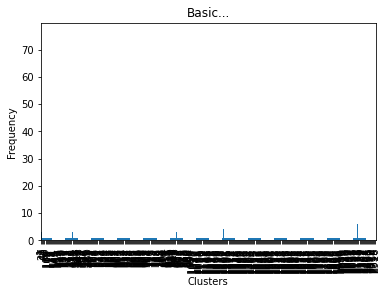

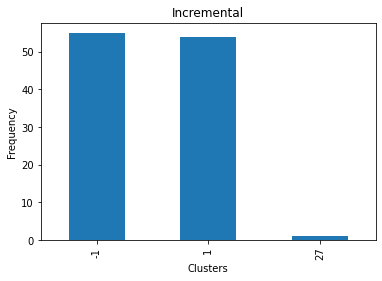

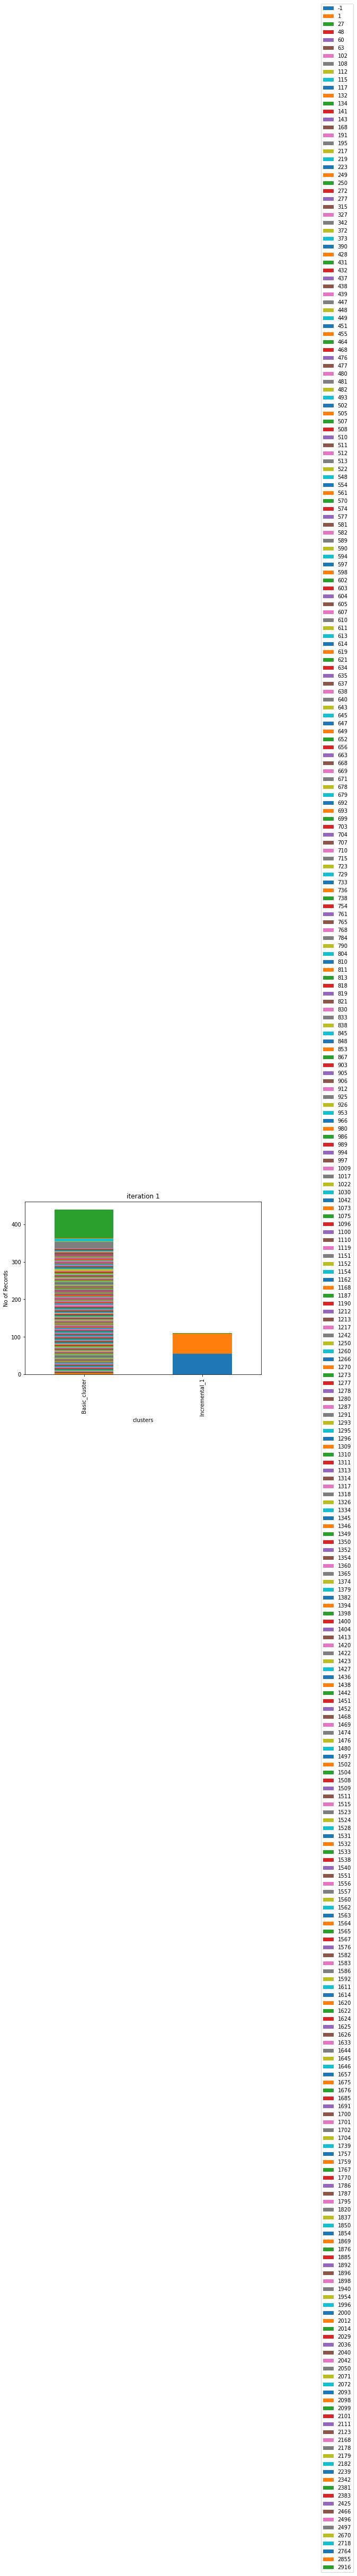

Execution time 58.53057599067688 seconds


In [ ]:
#main function
def main():
  start = time.time()
  #add csv name
  train,test,df1,df2 = scale(df)
  df_basic,df_train = basic_cluster_lone(train,df1)
  df_incremental , dftest = incremental_cluster(test,df2)
  merge_basic_incremental1 = mergefile_graph(df_basic,df_incremental)
  mergefile_representative(df_train,dftest)
  visualize(df_basic,df_incremental,merge_basic_incremental1)
  print('Execution time {} seconds'.format(time.time()-start))

if __name__=='__main__':
  main()